### Clean up high n number state by adding RSC pulses without OP

In [8]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_functions
from pathos.multiprocessing import Pool

In [9]:
clean_up_sequence = [[0, -3, RSC_functions.pulse_time(0, -3)], [1, -3, RSC_functions.pulse_time(1, -3)], [2, -5, RSC_functions.pulse_time(2, -5)],
                     [0, -3, RSC_functions.pulse_time(0, -2)], [1, -3, RSC_functions.pulse_time(1, -2)], [2, -4, RSC_functions.pulse_time(2, -4)],
                     [0, -3, RSC_functions.pulse_time(0, -3)], [1, -3, RSC_functions.pulse_time(1, -3)], [2, -5, RSC_functions.pulse_time(2, -5)],
                     [0, -2, RSC_functions.pulse_time(0, -2)], [1, -2, RSC_functions.pulse_time(1, -2)], [2, -4, RSC_functions.pulse_time(2, -4)],
                     [2, -3, RSC_functions.pulse_time(2, -3)], [2, -2, RSC_functions.pulse_time(2, -2)],
                     [2, -3, RSC_functions.pulse_time(2, -3)], [2, -2, RSC_functions.pulse_time(2, -2)],
                     [0, -1, RSC_functions.pulse_time(0, -1)], [1, -1, RSC_functions.pulse_time(1, -1)], [2, -2, RSC_functions.pulse_time(2, -2)],
                     [0, -1, RSC_functions.pulse_time(0, -1)], [1, -1, RSC_functions.pulse_time(1, -1)], [2, -1, RSC_functions.pulse_time(2, -1)],
                     [0, -1, RSC_functions.pulse_time(0, -1)], [1, -1, RSC_functions.pulse_time(1, -1)], [2, -2, RSC_functions.pulse_time(2, -2)],
                     [0, -1, RSC_functions.pulse_time(0, -1)], [1, -1, RSC_functions.pulse_time(1, -1)], [2, -1, RSC_functions.pulse_time(2, -1)],
                     ]

In [10]:
# Load sequence from text file
def load_best_sequence(filepath="best_sequence_1.txt"):
    with open(filepath, "r") as f:
        lines = f.readlines()
    sequence = [eval(line.strip()) for line in lines]  # [[axis, delta_n], ...]
    return sequence

Applying pulses: 100%|██████████| 280/280 [00:24<00:00, 11.56it/s]


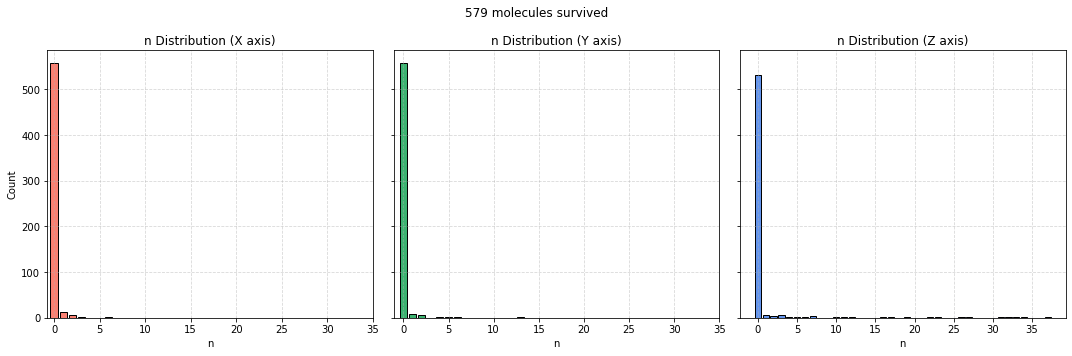

In [11]:
loaded_sequence = load_best_sequence('sequences/best_sequence_same_length.txt')
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(mol_list, loaded_sequence)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

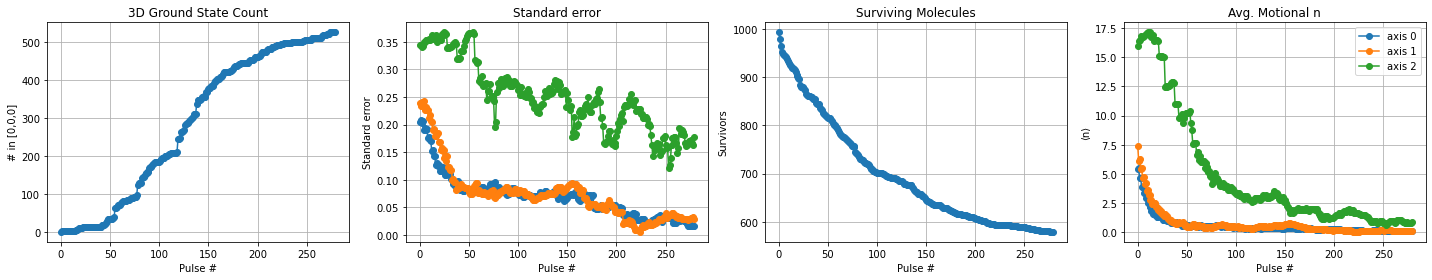

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Standard error
for i in [0, 1, 2]:
    axs[1].plot(range(len(sem)), np.array(sem)[:, i], marker='o', label=f'axis {i}')
axs[1].set_title("Standard error")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Standard error")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


Applying pulses: 100%|██████████| 28/28 [00:00<00:00, 660.35it/s]


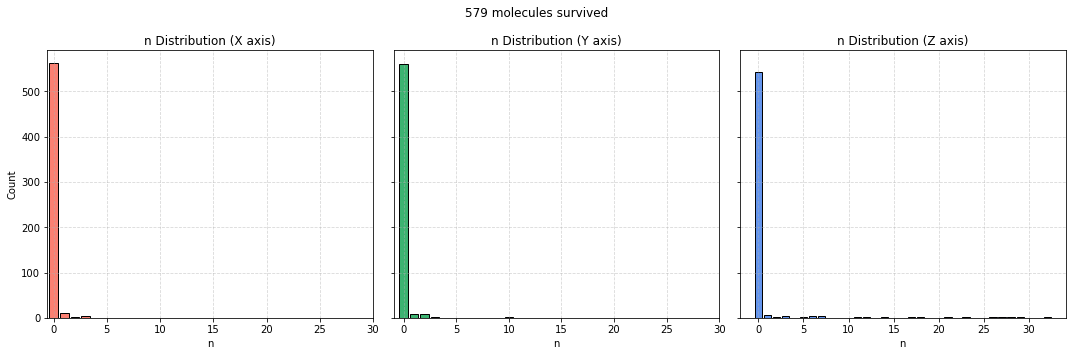

In [13]:
n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(mol_list, clean_up_sequence, optical_pumping=False)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

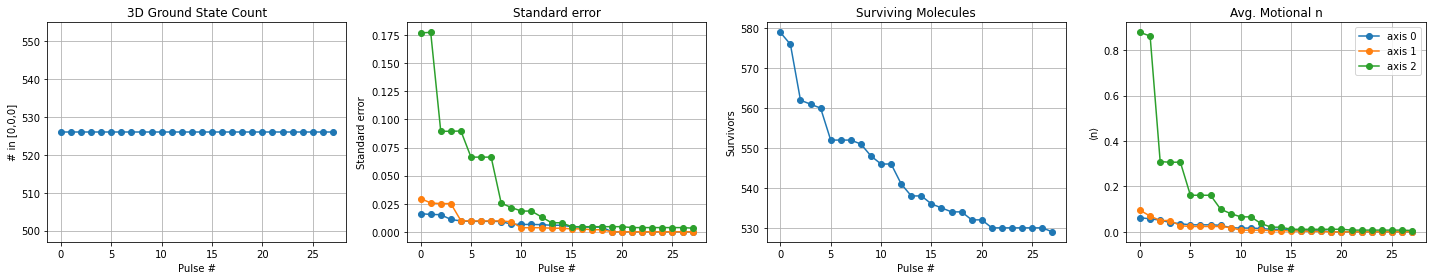

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Standard error
for i in [0, 1, 2]:
    axs[1].plot(range(len(sem)), np.array(sem)[:, i], marker='o', label=f'axis {i}')
axs[1].set_title("Standard error")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Standard error")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()
